In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [13]:
tickers = ['AAPL', 'MSFT', 'JPM' ]
raw= yf.download(
    tickers,
    start='2020-01-01',
    end='2025-06-27',
    auto_adjust=True,    # split/divided-adjusted close 
    progress=False
    )

print('column index:', raw.columns)
raw.head()

column index: MultiIndex([( 'Close', 'AAPL'),
            ( 'Close',  'JPM'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High',  'JPM'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low',  'JPM'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open',  'JPM'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume',  'JPM'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


Price           Close                               High              \
Ticker           AAPL         JPM        MSFT       AAPL         JPM   
Date                                                                   
2020-01-02  72.620850  120.733543  153.042282  72.681296  120.742109   
2020-01-03  71.914825  119.140297  151.136642  72.676454  119.906777   
2020-01-06  72.487854  119.045601  151.527313  72.526541  119.080057   
2020-01-07  72.146919  117.021744  150.145706  72.753800  118.726944   
2020-01-08  73.307526  117.934631  152.537323  73.609760  118.485808   

Price                         Low                               Open  \
Ticker            MSFT       AAPL         JPM        MSFT       AAPL   
Date                                                                   
2020-01-02  153.147093  71.373226  119.167574  150.860326  71.627100   
2020-01-03  152.403898  71.689965  118.055172  150.603064  71.847125   
2020-01-06  151.594018  70.783256  117.555704  149.126197  71.034717   
2020-01-07  152.137101  71.926892  116.970073  149.897978  72.497506   
2020-01-08  153.213833  71.849548  116.780608  150.498284  71.849548   

Price                                  Volume                      
Ticker             JPM        MSFT       AAPL       JPM      MSFT  
Date                                                               
2020-01-02  119.621105  151.289093  135480400  10803700  22622100  
2020-01-03  118.416881  150.850807  146322800  10386800  21116200  
2020-01-06  117.607375  149.669313  118387200  10259000  20813700  
2020-01-07  118.227438  151.803622  108872000  10531300  21634100  
2020-01-08  116.866721  151.432046  132079200   9695300  27746500

In [14]:
# isolate daily close prices for each ticker 
data = raw.xs('Close', level='Price', axis=1)
data.head()

Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-02,72.620850,120.733543,153.042282
2020-01-03,71.914825,119.140297,151.136642
2020-01-06,72.487854,119.045601,151.527313
2020-01-07,72.146919,117.021744,150.145706
2020-01-08,73.307526,117.934631,152.537323


In [15]:
# peek at first and last rows 
display(data.head(1))
display(data.tail())

#check for missing values
print('Any NaNs? ->', data.isna().values.any())

Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-02,72.62085,120.733543,153.042282


Ticker,AAPL,JPM,MSFT
Date,,,
2025-06-20,201.000000,275.000000,477.399994
2025-06-23,201.500000,278.269989,486.000000
2025-06-24,200.300003,281.260010,490.109985
2025-06-25,201.559998,284.059998,492.269989
2025-06-26,201.000000,288.750000,497.450012


Any NaNs? -> False


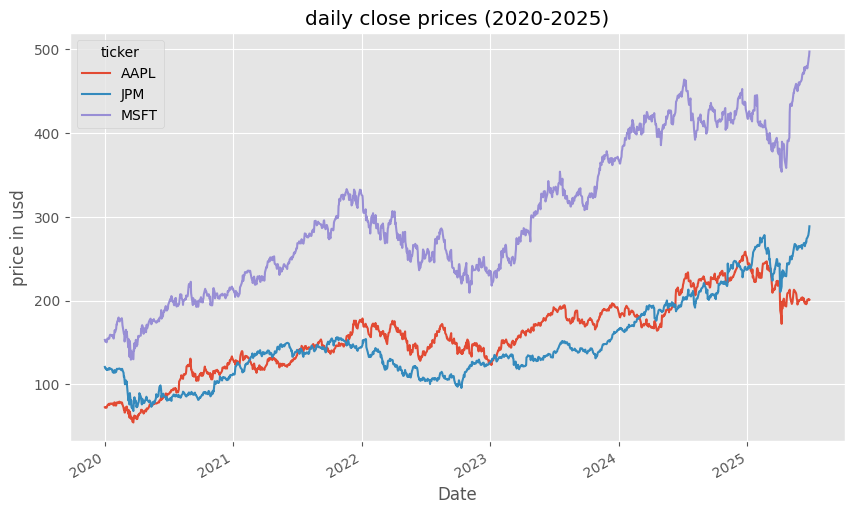

In [16]:
# visualize the price evaluation 
plt.figure(figsize=(10,6))
data.plot(ax=plt.gca())
plt.title('daily close prices (2020-2025)')
plt.ylabel('price in usd')
plt.xlabel('Date')
plt.legend(title='ticker')
plt.show()

In [17]:
# daily pct returns
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,JPM,MSFT
Date,,,
2020-01-03,-0.009722,-0.013196,-0.012452
2020-01-06,0.007968,-0.000795,0.002585
2020-01-07,-0.004703,-0.017001,-0.009118
2020-01-08,0.016087,0.007801,0.015929
2020-01-09,0.021241,0.003651,0.012493


In [18]:
# qucik stats 
stats = (
    returns.agg(['mean', 'std', 'min', 'max']).T.rename(columns={'mean': 'Daily Mean return', 'std': 'Daily Volatility'})
)
stats

,Daily Mean return,Daily Volatility,min,max
Ticker,,,,
AAPL,0.000950,0.020550,-0.128647,0.153288
JPM,0.000839,0.020326,-0.149649,0.180125
MSFT,0.001040,0.019175,-0.147390,0.142169


<Axes: title={'center': 'yearly volatility'}, xlabel='year', ylabel='volatility'>

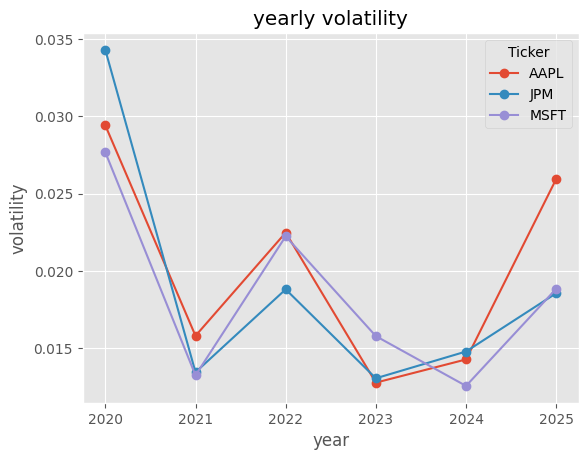

In [19]:
# volatility year by year
returns.groupby(returns.index.year).std().plot(
    #figsize=(10,6),
    title= 'yearly volatility',
    ylabel='volatility',
    xlabel='year',
    marker='o'
    
)

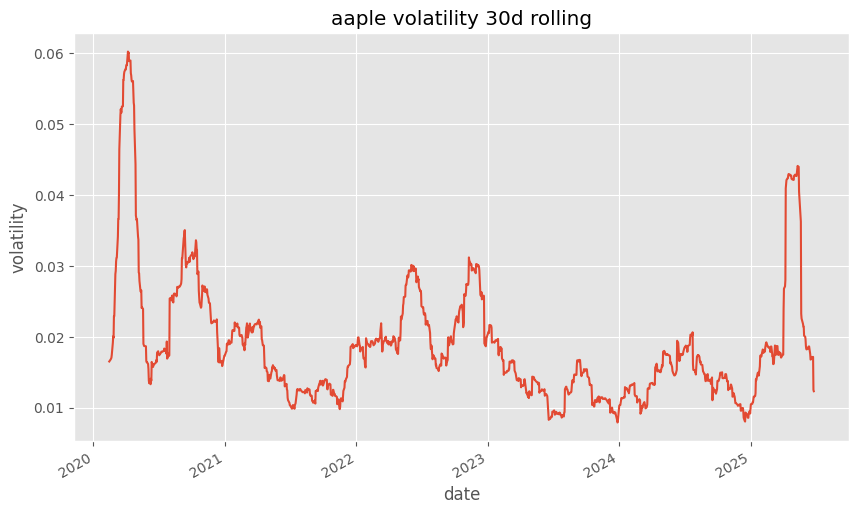

In [20]:
#ROLLING VOLATITLY FO AAPL
aapl_30d_vol = returns['AAPL'].rolling(30).std()
plt.figure(figsize=(10,6))
aapl_30d_vol.plot()
plt.title("aaple volatility 30d rolling")
plt.ylabel('volatility')
plt.xlabel('date')
plt.show()


In [23]:
# save to disk for sql/modling 
data.to_parquet('data/01_EDA_stock/close_prices.paraquet')
returns.to_parquet('data/01_EDA_stock/daily_returns.parquet')
print('saved parquet files"')

saved parquet files"


In [22]:
import os
os.chdir("/FIN-AI-BEAST")  # Set to your project root